In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
df.shape

(303, 14)

In [109]:
# Let's find the distribution of age with respect to gender
c1 = alt.Chart(df).mark_bar().encode(
    alt.X('age', bin=True, scale=alt.Scale(zero=False), title='Age'),
    alt.Y('count()'),
    alt.Color('sex:N', legend=alt.Legend(title='Gender'))
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

# Let's find count of each sex and facet these two charts
c2 = alt.Chart(df).mark_bar().encode(
    alt.X('sex:N', title='Gender'),
    alt.Y('count()', title=''),
    alt.Color('sex:N')
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

In [110]:
c1 = c1.properties(title = 'Distribution of Heart Patients by Age and Gender')
c1.configure(title = alt.VgTitleConfig(anchor='middle'))
chart = c1 | c2
chart = chart.configure_legend(titleFontSize=10)
chart = chart.configure_axis(titleFontSize=10)

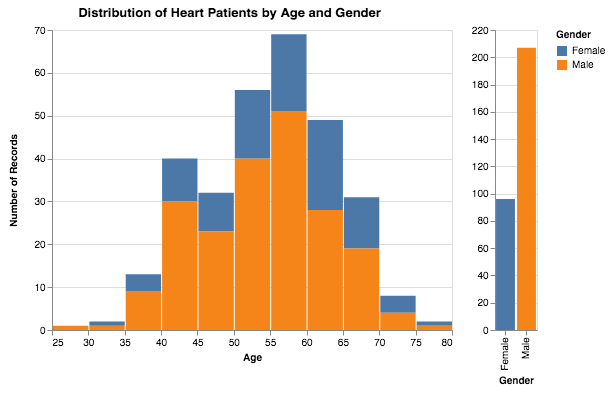

In [111]:
chart

In [112]:
alt.themes.enable('opaque')
chart.save('plots/patients_gender_age.png', scale_factor=7.0)

In [187]:
c1 = alt.Chart(df).mark_bar().encode(
    alt.X('cp:N', title='Chest Pain Categories'),
    alt.Y('count()', scale=alt.Scale(zero=False)),
    alt.Color('sex:N', legend=alt.Legend(title='Gender'))
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

c2 = alt.Chart(df).mark_bar().encode(
    alt.X('trestbps:N', title='Resting Blood Pressure', bin=True),
    alt.Y('count()', title=''),
    alt.Color('sex:N')
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

c3 = alt.Chart(df).mark_point().encode(
    alt.X('cp:N', title='Chest Pain Categories'),
    alt.Y('trestbps:Q', scale=alt.Scale(zero=False), title='Resting Blood Pressure'),
    alt.Color('sex:N')
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

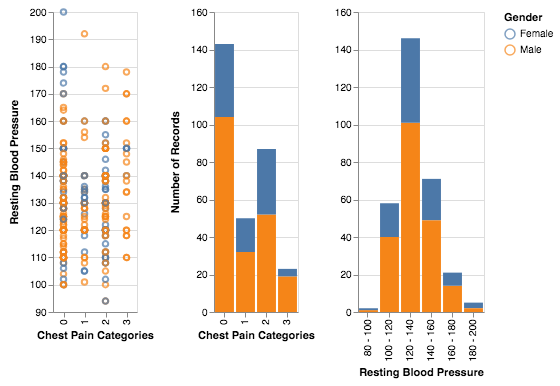

In [195]:
chart = c3 | c1 | c2
chart

In [196]:
alt.themes.enable('opaque')
chart.save('plots/patients_cp_trestbps_gender.png', scale_factor=7.0)

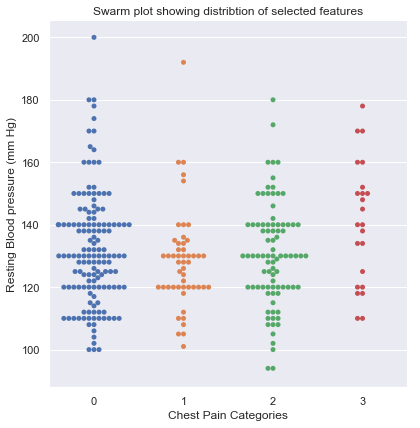

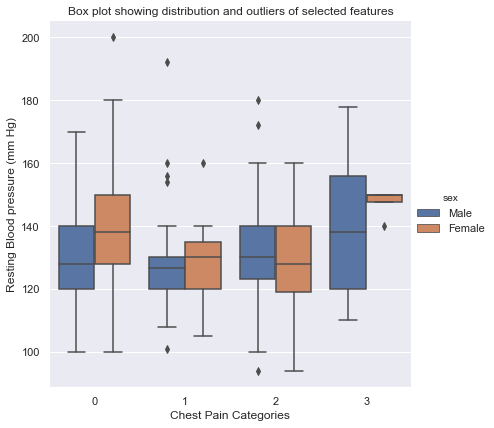

In [243]:
temp_df = df.copy()
map_dict = {0: 'Female', 1: 'Male'}
temp_df['sex'] = temp_df['sex'].map(map_dict)
sns.set()
g = sns.catplot(x="cp", y="trestbps", kind="swarm", data=temp_df, height=6)
g.set(xlabel='Chest Pain Categories', ylabel='Resting Blood pressure (mm Hg)', title="Swarm plot showing distribtion of selected features")
h = sns.catplot(x="cp", y="trestbps", hue="sex", kind="box", data=temp_df, height=6)
h.set(xlabel='Chest Pain Categories', ylabel='Resting Blood pressure (mm Hg)', title="Box plot showing distribution and outliers of selected features")

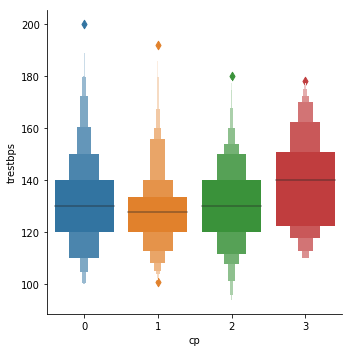

In [206]:
sns.catplot(x="cp", y="trestbps", kind="boxen",
            data=df.sort_values("age"));

In [ ]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

In [ ]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

In [ ]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

In [ ]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

In [173]:
c1 = alt.Chart(df).mark_point().encode(
    alt.X('age:Q', scale=alt.Scale(zero=False), title='Age'),
    alt.Y('trestbps:Q', scale=alt.Scale(zero=False)),
    alt.Color('sex:N')
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

c2 = alt.Chart(df).mark_bar().encode(
    alt.X('age', bin=True, scale=alt.Scale(zero=False), title='Age'),
    alt.Y('count():Q'),
    alt.Color('cp:N', legend=alt.Legend(title='Gender'))
).transform_calculate(
    "sex", alt.expr.if_(alt.datum.sex == 1, "Male", "Female"))

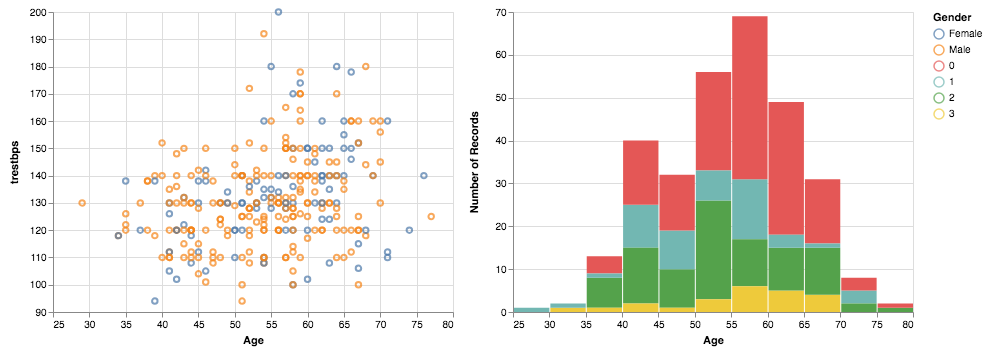

In [176]:
c1 | c2